In [1]:
%matplotlib inline

import PseudoNetCDF as pnc
import pycno
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
nef = pnc.pncopen('output/ne_10m_admin_0_countries.ADM0_A3.12US2.nc', format='ioapi')
cno = pycno.cno(proj=nef.getproj(withgrid=True))

In [8]:
regionkeys = sorted([k for k in nef.variables if k != 'TFLAG'])

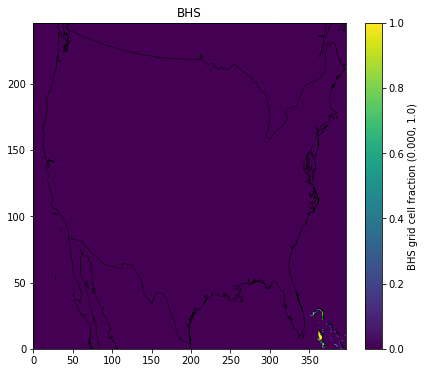

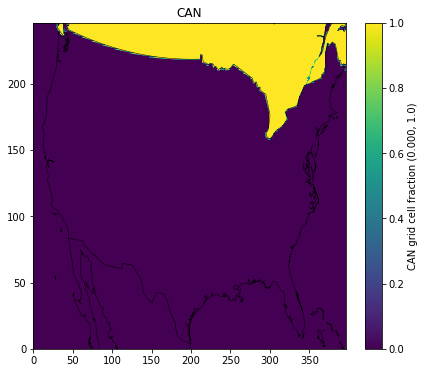

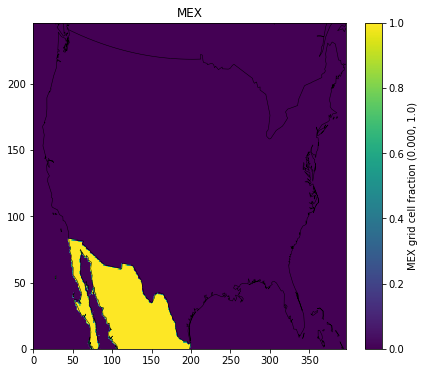

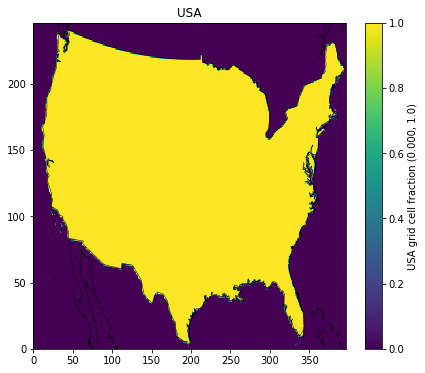

In [9]:
for key in regionkeys:
    vals = nef.variables[key][0, 0]
    vmin = vals.min()
    vmax = vals.max()
    if vals.sum() > 0:
        fig, ax = plt.subplots(figsize=(7, 6))
        p = ax.pcolormesh(vals)
        fig.colorbar(p, label=f'{key} grid cell fraction ({vmin:.3f}, {vmax:.1f})')
        cno.draw('MWDB_Coasts_Countries_3.cnob')
        ax.set_title(key)
    else:
        print('N/A', key)